In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
path = 'C:/Users/Gabri/Documents/Python/Coursera IBM/Data Analysis with Python/WHO-COVID-19-global-data.csv'
df = pd.read_csv(path)
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [8]:
missing = df.isnull()
for column in missing.columns.values.tolist():
    print (column)
    print (missing[column].value_counts())
    print("")


Date_reported
False    144570
Name: Date_reported, dtype: int64

Country_code
False    143960
True        610
Name: Country_code, dtype: int64

Country
False    144570
Name: Country, dtype: int64

WHO_region
False    144570
Name: WHO_region, dtype: int64

New_cases
False    144570
Name: New_cases, dtype: int64

Cumulative_cases
False    144570
Name: Cumulative_cases, dtype: int64

New_deaths
False    144570
Name: New_deaths, dtype: int64

Cumulative_deaths
False    144570
Name: Cumulative_deaths, dtype: int64



In [9]:
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [13]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [15]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format = '%Y-%m-%d')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [16]:
df.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [20]:
df.describe(include = "all", datetime_is_numeric=True)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,144570,143960,144570,144570,144570.000000,1.445700e+05,144570.000000,144570.000000
unique,NaN,236,237,7,NaN,NaN,NaN,NaN
top,NaN,AF,Afghanistan,EURO,NaN,NaN,NaN,NaN
freq,NaN,610,610,37820,NaN,NaN,NaN,NaN
mean,2020-11-02 11:59:59.999999744,NaN,NaN,NaN,1514.469364,3.088104e+05,31.401556,7199.287625
min,2020-01-03 00:00:00,NaN,NaN,NaN,-32952.000000,0.000000e+00,-60.000000,0.000000
25%,2020-06-03 00:00:00,NaN,NaN,NaN,0.000000,3.000000e+01,0.000000,0.000000
50%,2020-11-02 12:00:00,NaN,NaN,NaN,11.000000,3.877000e+03,0.000000,61.000000
75%,2021-04-04 00:00:00,NaN,NaN,NaN,349.000000,7.114375e+04,5.000000,1167.000000
max,2021-09-03 00:00:00,NaN,NaN,NaN,414188.000000,3.930027e+07,8786.000000,638632.000000


In [112]:
#Find countries with the most cases. Then filter the table.
table = pd.pivot_table(df, values = 'Cumulative_cases', index = ['Country'], aggfunc=np.sum)
table.sort_values('Cumulative_cases', axis = 0, ascending = False).head(15)

,Cumulative_cases
Country,
United States of America,9295453206
India,6198573805
Brazil,4465885388
Russian Federation,1516529553
France,1381262554
The United Kingdom,1308225627
Turkey,1223616683
Spain,1064583868
Italy,1052410373


In [86]:
df2 = df[df['Country'].isin(['United States of America', 'India', 'Brazil', 'Russian Federation', 'France', 'The United Kingdom', 'Turkey', 'Spain', 'Italy', 'Argentina', 'Colombia', 'Germany'])]

In [87]:
df2.reset_index(inplace = True, drop = True)
df2.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AR,Argentina,AMRO,0,0,0,0
1,2020-01-04,AR,Argentina,AMRO,0,0,0,0
2,2020-01-05,AR,Argentina,AMRO,0,0,0,0
3,2020-01-06,AR,Argentina,AMRO,0,0,0,0
4,2020-01-07,AR,Argentina,AMRO,0,0,0,0


In [88]:
df2 = pd.get_dummies(df2, columns = ['Country'])
df2.head()

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_Argentina,Country_Brazil,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Russian Federation,Country_Spain,Country_The United Kingdom,Country_Turkey,Country_United States of America
0,2020-01-03,AR,AMRO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-04,AR,AMRO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-05,AR,AMRO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-06,AR,AMRO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-07,AR,AMRO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x = df[['Cumulative_cases']]
y = df['Cumulative_deaths']
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [24]:
yhat = lm.predict(x)

In [25]:
print(f"Deaths = {lm.intercept_} + {lm.coef_}x(Cumulative Cases)")

Deaths = 1502.5283906530703 + [0.01844744]x(Cumulative Cases)


In [89]:
df2.columns

Index(['Date_reported', 'Country_code', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths',
       'Country_Argentina', 'Country_Brazil', 'Country_Colombia',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Russian Federation', 'Country_Spain',
       'Country_The United Kingdom', 'Country_Turkey',
       'Country_United States of America'],
      dtype='object')

In [117]:
#Multiple linear regression
z = df2[['Cumulative_cases', 'Country_Argentina', 'Country_Brazil', 'Country_Colombia',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Russian Federation', 'Country_Spain',
       'Country_The United Kingdom', 'Country_Turkey',
       'Country_United States of America']]
lm.fit(z, df2['Cumulative_deaths'])
print(lm.intercept_)
print(lm.coef_)

In [123]:
CoefficientTable = pd.DataFrame(lm.coef_, columns = ['Coefficients'])
CoefficientTable['Country'] = ('Cumulative_cases', 'Argentina', 'Brazil', 'Colombia',
       'France', 'Germany', 'India', 'Italy',
       'Russian Federation', 'Spain',
       'The United Kingdom', 'Turkey',
       'United States of America')
print(CoefficientTable)

    Coefficients                   Country
0       0.016725          Cumulative_cases
1   -9194.338018                 Argentina
2   61172.234848                    Brazil
3   -3782.155312                  Colombia
4   -1945.230987                    France
5   -6505.992505                   Germany
6  -51719.258728                     India
7   15412.638605                     Italy
8   -5760.078776        Russian Federation
9   -1710.047653                     Spain
10  13343.528163        The United Kingdom
11 -32768.831286                    Turkey
12  23457.531648  United States of America


In [116]:
lm = LinearRegression()
lm.fit(z, df2['Cumulative_deaths'])
yhat2 = lm.predict(z)
yhat2

array([  9275.35577537,   9275.35577537,   9275.35577537, ...,
       693166.84098232, 695743.53993496, 699240.1026346 ])

<AxesSubplot:xlabel='Cumulative_deaths', ylabel='Density'>

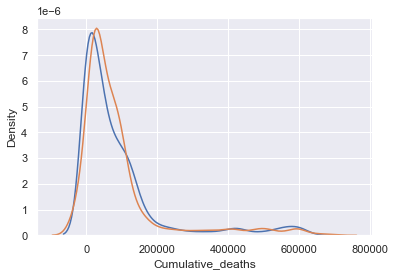

In [103]:
#Overlay histograms of MLR model with actual values too visualize model
ax1 = sns.kdeplot(data = df2, x = 'Cumulative_deaths')
sns.kdeplot(yhat2, ax = ax1)

In [105]:
#Find r-square of model
score = lm.score(z, df2['Cumulative_deaths'])
print(f"The r-squre of the model is {score}")

The r-squre of the model is 0.9477863069696525


In [106]:
#Find MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2['Cumulative_deaths'], yhat2)
print(f"The mean squared error is: {mse}")

The mean squared error is: 847862715.179255


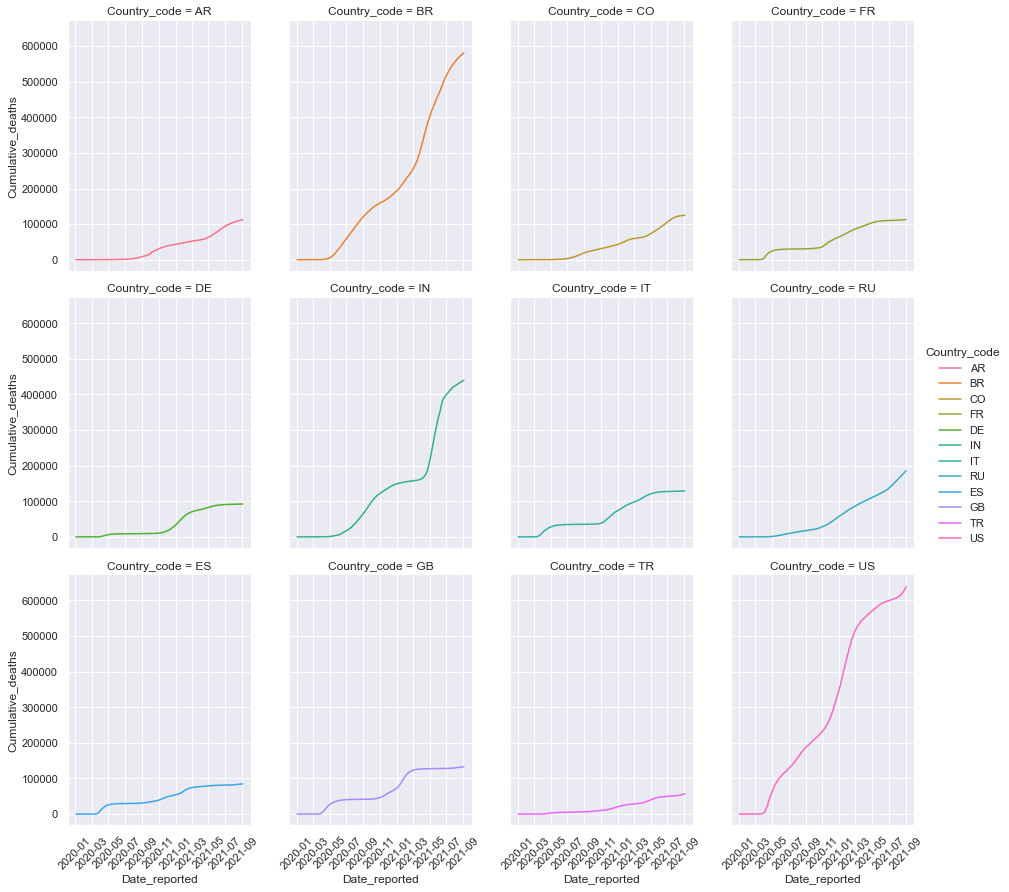

In [156]:
ax = sns.relplot(data = df2, x = "Date_reported", y = "Cumulative_deaths", col = "Country_code", 
kind = "line", hue = "Country_code", col_wrap = 4, height = 4, aspect = .8)
ax.set_xticklabels(rotation = 45)

In [157]:
dfUSA = df[df['Country'].isin(['United States of America'])]
dfUSA.reset_index(inplace = True, drop = True)
dfUSA.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,US,United States of America,AMRO,0,0,0,0
1,2020-01-04,US,United States of America,AMRO,0,0,0,0
2,2020-01-05,US,United States of America,AMRO,0,0,0,0
3,2020-01-06,US,United States of America,AMRO,0,0,0,0
4,2020-01-07,US,United States of America,AMRO,0,0,0,0


In [158]:
x = dfUSA[['Cumulative_cases']]
y = dfUSA['Cumulative_deaths']
lm = LinearRegression()
lm.fit(x,y)
yhat = lm.predict(x)

<AxesSubplot:xlabel='Cumulative_deaths', ylabel='Density'>

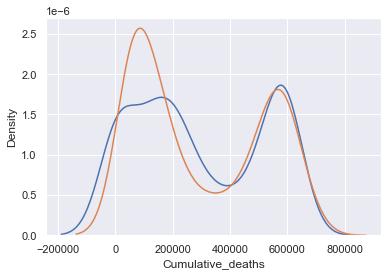

In [159]:
#Given the peaks that don't match, simple linear regression is not a good model for looking at just one country.
ax1 = sns.kdeplot(data = dfUSA, x = 'Cumulative_deaths')
sns.kdeplot(yhat, ax = ax1)

<AxesSubplot:xlabel='Cumulative_cases', ylabel='Cumulative_deaths'>

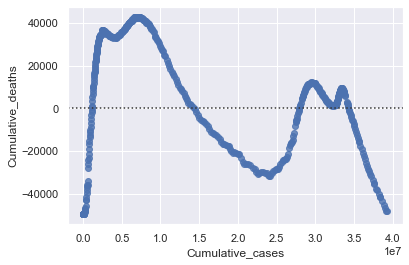

In [160]:
#The residual plot further solidifies the above assumption.
sns.residplot(x = x, y = y, data = dfUSA)

Text(0.5, 1.0, 'Cumulative Deaths from COVID in the USA')

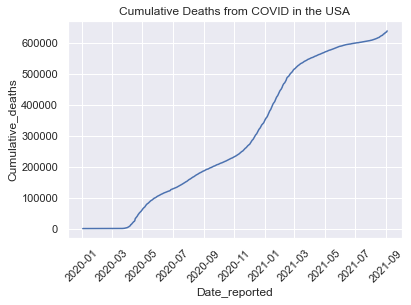

In [164]:
ax = sns.lineplot(data = dfUSA, x = "Date_reported", y = "Cumulative_deaths")
plt.xticks(rotation = 45)
plt.title("Cumulative Deaths from COVID in the USA")